# Robotic coordination

In [1]:
import numpy as np
import sympy as sp
from numpy.linalg import inv
from graph import Graph,rounding,latex
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook','grid'])

Let consider a network of 16 robots with the dynamics
$$\dot{p}_i = u_i \quad i = 1,\dots, n$$

where $p_i \in \mathbb{R}^2$ is the position of the robot $i$.

Given a random position we want to determine the the dynamics given the control law:

$$  u_1 = \frac{1}{2}(p_1 + p_2) - p_1\\ 
    \quad\\
    u_i = \frac{1}{3}(p_{i-1} + p_{i+1}) - p_i\\
    \quad\\
    u_n = \frac{1}{2}(p_{n-1} + p_n) - p_n
$$

In [2]:
# number of robots
n = 16

# We define the laplacian matrix from the control law
L = np.zeros((n,n))

L[0,0] = -1/2
L[0,1] = 1/2
L[n-1,n-2] = 1/2
L[n-1,n-1] = -1/2


for k in range (1,n-1):
    L[k,k] = -2/3
    L[k,k-1] = 1/3
    L[k,k+1] = 1/3

L = -L
display(latex(L))

Matrix([
[               0.5,               -0.5,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0],
[-0.333333333333333,  0.666666666666667, -0.333333333333333,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0],
[                 0, -0.333333333333333,  0.666666666666667, -0.333333333333333,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0],
[                 0,     

Looking at the conrol law we can define the link relation between nodes.

In [3]:
w = np.zeros(n)
w[0] = 1
w[n-1] = 1
for i in range(1,n-1):
    w[i] = 2

print('Degree matrix:')
D = np.diag(w)
display(latex(D))

W = D - L
print('Adjacency matrix:')
display(latex(W))

P = np.linalg.inv(D)@W


Degree matrix:


Matrix([
[1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0, 2.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0, 2.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0, 2.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0, 2.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0, 2.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0, 2.0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0, 2.0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0, 2.0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0, 2.0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 2.0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 2.0,   0,   0,   0,   0],
[  0,  

Adjacency matrix:


Matrix([
[              0.5,               0.5,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0],
[0.333333333333333,  1.33333333333333, 0.333333333333333,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0],
[                0, 0.333333333333333,  1.33333333333333, 0.333333333333333,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0,                 0],
[                0,                 0, 0.333333333333333,  1.333333333333

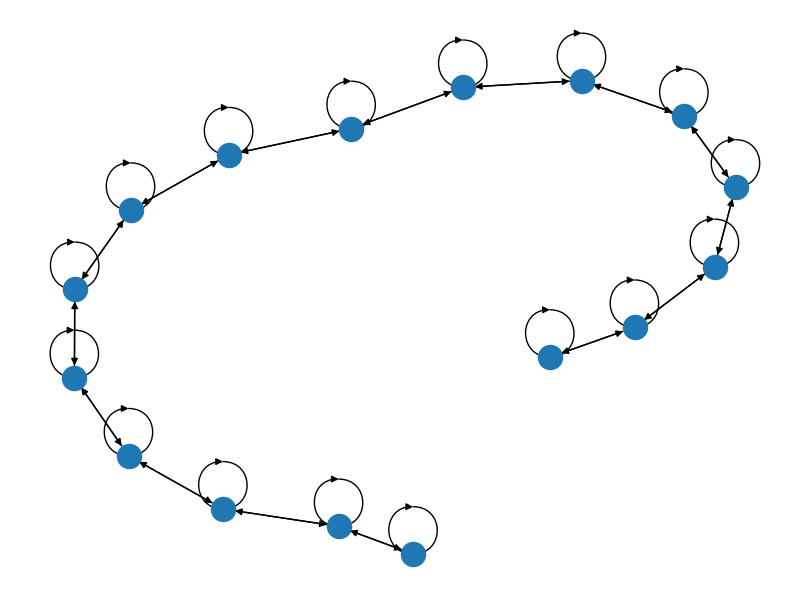

In [4]:
G = Graph(W) 
G.draw_graph()

___

The dynamics is given by:
$$\dot{p} = - L p$$
that can be discetized for a numerical simulation as:
$$p_{k+1} = p_k - Lp \,dt$$
where $dt$ is the integration step of the simulation.

In [5]:
# Initialized robot position randomplìy inside a 10m x 10, squared box
x_0 = np.random.uniform(0,10,n)
y_0 = np.random.uniform(0,10,n)
step = 10000
dt = 0.01
x = x_0
y = y_0
x_plot = x_0.copy()
y_plot = y_0.copy()

for i in range(step):
    x = x - (L @ x)* dt
    y = y - (L @ y)* dt
    x_plot = np.append(x_plot, x, axis=0)
    y_plot = np.append(y_plot, y, axis=0)
x_plot = np.reshape(x_plot, (step +1, n))
y_plot = np.reshape(y_plot, (step +1, n))

In [6]:
display(rounding(x,3),rounding(y,3))

array([5.561, 5.568, 5.584, 5.608, 5.64 , 5.677, 5.716, 5.758, 5.798,
       5.836, 5.87 , 5.899, 5.923, 5.941, 5.952, 5.956])

array([4.599, 4.603, 4.612, 4.626, 4.645, 4.667, 4.692, 4.718, 4.744,
       4.77 , 4.793, 4.814, 4.832, 4.845, 4.853, 4.856])

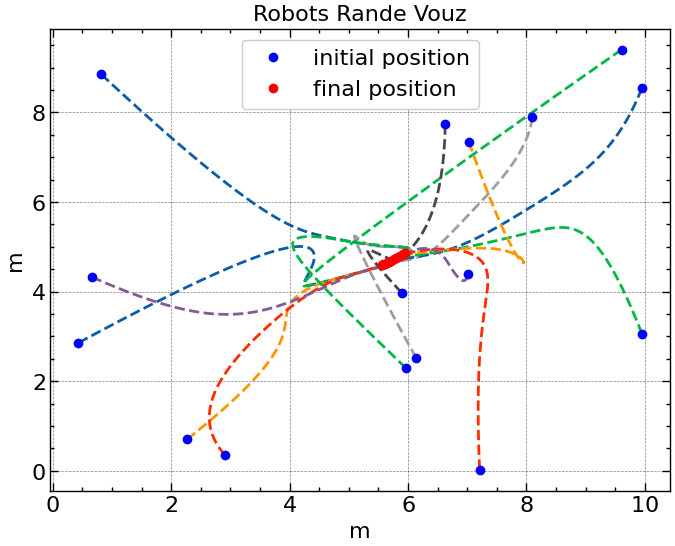

In [7]:
plt.figure()
for i in range(x_plot.shape[1]):
    plt.plot(x_plot[:,i],y_plot[:,i],'--')
plt.plot(x_0,y_0,'o', color='blue', label='initial position')
plt.plot(x,y,'o', color='red', label= 'final position')
plt.legend()
plt.xlabel('m')
plt.ylabel('m')
plt.title('Robots Rande Vouz')
plt.savefig("Robotics Rande VOuz.png")
plt.show()


Analytically we can computed the consensus value as:
$$ \bar{\alpha} = x^T(0) \, \bar{\pi}$$

where $\bar{\pi}$ is the normalized invariant distribution centrality equal to:
$$ \bar{\pi} = \frac{D^{-1} \, \pi}{\mathbb{1}^T \, D^{-1} \, \pi} 

In [8]:
invariant_centrality = G.in_degree()/(G.size*G.average_degree())
invariant_normalized = inv(D)@invariant_centrality/(np.ones(G.size).T @ inv(D)@invariant_centrality)

alpha_x = invariant_normalized.T@ x_0
alpha_y = invariant_normalized.T@ y_0

In [9]:
display(round(alpha_x,3),round(alpha_y,3))

5.661

4.64

We now introduce a new control law with 2 fixed robots at positions $p_0 = (0,0)$ and $p_1 = (10,10), while the other 16 robots obey to:
$$ u_i = \frac{1}{3} (p_{i-1} + p_i + p_{i+1}) - p_i \quad i = 1,\dots,n$$

In [10]:
n_2 = 18

L2 = np.zeros((n_2,n_2))

for k in range(1,n_2-1):
    L2[k,k] = -2/3
    L2[k,k-1] = 1/3
    L2[k,k+1] = 1/3

L2 = -L2
display(latex(L2))


Matrix([
[                 0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0],
[-0.333333333333333,  0.666666666666667, -0.333333333333333,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0],
[                 0, -0.333333333333333,  0.666666666666667, -0.333333333333333,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                  0,       

In [11]:
x_0 = np.random.uniform(0,10,n_2)
y_0 = np.random.uniform(0,10,n_2)

x_0[0] = 0
x_0[-1] = 10

y_0[0] = 0
y_0[-1] = 10

step = 10000
dt = 0.01

x = x_0
y = y_0

x_plot = x_0.copy()
y_plot = y_0.copy()


for i in range(step):
    x = x - (L2 @ x)* dt
    y = y - (L2 @ y)* dt
    x_plot = np.append(x_plot, x, axis=0)
    y_plot = np.append(y_plot, y, axis=0)
x_plot = np.reshape(x_plot, (step +1, n_2))
y_plot = np.reshape(y_plot, (step +1, n_2))

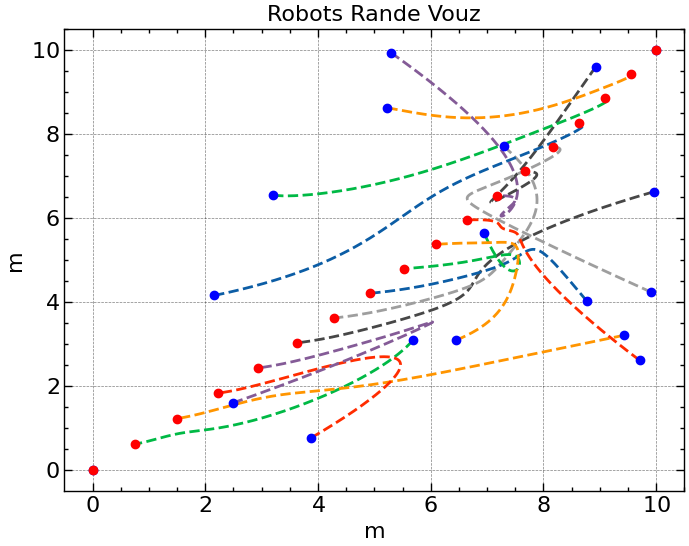

In [12]:
plt.figure()

for i in range(x_plot.shape[1]):
    plt.plot(x_plot[:,i],y_plot[:,i],'--')
plt.plot(x_0,y_0,'o', color='blue', label='Initial position')
plt.plot(x,y,'o', color='red', label='Final position')
plt.xlabel('m')
plt.ylabel('m')
plt.title('Robots Rande Vouz')
plt.savefig("Robbotic coordination with  2 blocked robots.png")
plt.show()